In [1]:
using Random, GMRF

include("src/dataGen.jl");
include("src/cavi.jl");
include("src/mcmc.jl");
include("src/plotting.jl");
include("src/evaluation.jl");

In [2]:
M₂ = 200;
M₁ = 200;
M = M₁ * M₂;

In [3]:
Random.seed!(300);
Fmu = iGMRF(M₁, M₂, 1, 1);
Fphi = iGMRF(M₁, M₂, 1, 10);
gridTarget = generateTargetGrid(Fmu, Fphi);
gridTarget[:, :, 1] = gridTarget[:, :, 1] .+ 10.0;
gridTarget[:, :, 2] = gridTarget[:, :, 2] .+ 1.0;
gridTarget[:, :, 3] = gridTarget[:, :, 3] .+ 0.25;
nobs = 100;
data = generateData(gridTarget, nobs);

In [4]:
nEpoch = 4;
epochSize = 5;

initialValues = Dict(
    :μ => zeros(M),
    :ϕ => zeros(M),
    :ξ => 0.0,
    :kappaUparam => ((M - 1) / 2 + 1) / .1,
    :kappaVparam => ((M - 1) / 2 + 1) / 1,
);

spatialScheme = Dict(
    :M => M,
    :Fmu => Fmu,
    :Fphi => Fphi,
    :data => data,
);

In [5]:
include("src/cavi.jl");

res = runCAVI(nEpoch, epochSize, initialValues, spatialScheme);

Itération 1...
Itération 2...
Itération 3...
Itération 4...
Itération 5...
Itération 6...
Itération 7...
Itération 8...
Itération 9...
Itération 10...
Itération 11...
Itération 12...
Itération 13...
Itération 14...
Itération 15...
Itération 16...
Itération 17...
Itération 18...
Itération 19...
Itération 20...
Done ! :)


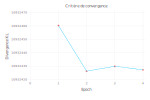

In [6]:
plotConvergenceCriterion(res.MCKL)

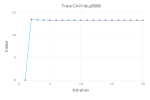

In [7]:
plotTraceCAVI(res.traces[:muMean][1, :], "μ20000")

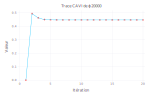

In [8]:
plotTraceCAVI(res.traces[:phiMean][1, :], "ϕ20000")

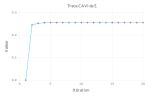

In [9]:
plotTraceCAVI(res.traces[:xiMean], "ξ")

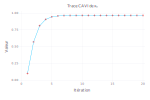

In [10]:
trace = res.traces[:kappaUparams][1, :] ./ res.traces[:kappaUparams][2, :];

plotTraceCAVI(trace, "κᵤ")

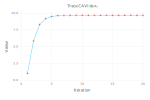

In [11]:
trace = res.traces[:kappaVparams][1, :] ./ res.traces[:kappaVparams][2, :];

plotTraceCAVI(trace, "κᵥ")

# MCMC

In [ ]:
datastructure = Dict(
    :Y => data,
    :Fmu => Fmu,
    :Fphi => Fphi,
);

niter = 10000;

initialvalues = Dict(
    :μ => zeros(M),
    :ϕ => zeros(M),
    :ξ => .1,
    :κᵤ => .1,
    :κᵥ => 1.0,
);

stepsize = Dict(
    :μ => 1.3,
    :ϕ => .4,
    :ξ => .002,
);

In [13]:
include("src/mcmc.jl")

chain = mcmc(datastructure, niter, initialvalues, stepsize);

Progress:  46%|██████████████████▉                      |  ETA: 1 days, 4:44:17KExcessive output truncated after 524376 bytes.

In [24]:
changerate(chain)

             Change Rate
          μ1       0.323
          μ2       0.293
          μ3       0.172
          μ4       0.359
          μ5       0.439
          μ6       0.249
          μ7       0.226
          μ8       0.212
          μ9       0.179
         μ10       0.230
         μ11       0.199
         μ12       0.273
         μ13       0.154
         μ14       0.188
         μ15       0.163
         μ16       0.121
         μ17       0.184
         μ18       0.231
         μ19       0.202
         μ20       0.337
         μ21       0.225
         μ22       0.203
         μ23       0.191
         μ24       0.234
         μ25       0.337
         μ26       0.344
         μ27       0.214
         μ28       0.386
         μ29       0.348
         μ30       0.260
         μ31       0.336
         μ32       0.234
         μ33       0.406
         μ34       0.172
         μ35       0.226
         μ36       0.313
         μ37       0.273
         μ38       0.266
         μ39       0.321


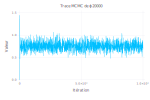

In [41]:
plotTraceMCMC(chain, "ϕ20000")

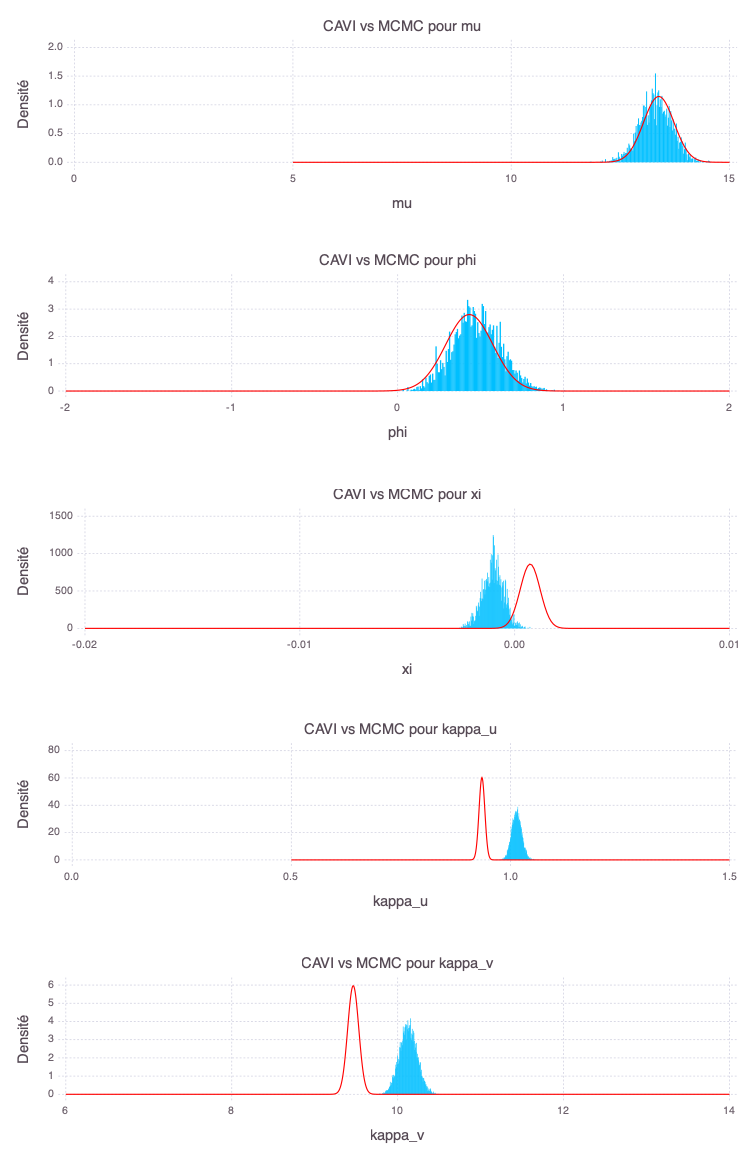

In [39]:
include("src/plotting.jl");

plotCAVIvsMCMC(1, caviRes=res, mcmcChain=chain, warmingSize=1000)

In [25]:
compDistance(res.traces, gridTarget)

74.3793826405794

In [26]:
compDistance(chain, gridTarget, 1000)

74.26560609784917

In [45]:
res.traces[:kappaUparams][1, :] ./ res.traces[:kappaUparams][2, :]

20-element Vector{Float64}:
 0.1
 0.20767583775576692
 0.4552310673767217
 0.6375423909700941
 0.7543354470291084
 0.8262508608438041
 0.8698393154400219
 0.8960636852773072
 0.9117794540815568
 0.9211766135425921
 0.9267888410279738
 0.9301385240976983
 0.9321370463124408
 0.9333295722146806
 0.9340398269813259
 0.9344638025004048
 0.9347168417215377
 0.9348674541873753
 0.9349551885609412
 0.9350063931753952